#Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Taking Microsoft stock dataset
data = pd.read_csv('MSFT.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-28,285.190002,290.980011,281.459991,289.630005,286.816254,33646600
1,2022-04-29,288.609985,289.880005,276.500000,277.519989,274.823853,37073900
2,2022-05-02,277.709991,284.940002,276.220001,284.470001,281.706390,35151100
3,2022-05-03,283.959991,284.130005,280.149994,281.779999,279.042511,25978600
4,2022-05-04,282.589996,290.880005,276.730011,289.980011,287.162872,33599300


In [ ]:
# Choosing to model and predict Closing price of stock
df = data[['Date', 'Close']]
df.head(3)

,Date,Close
0,2022-04-28,289.630005
1,2022-04-29,277.519989
2,2022-05-02,284.470001


Text(0, 0.5, 'Close Price')

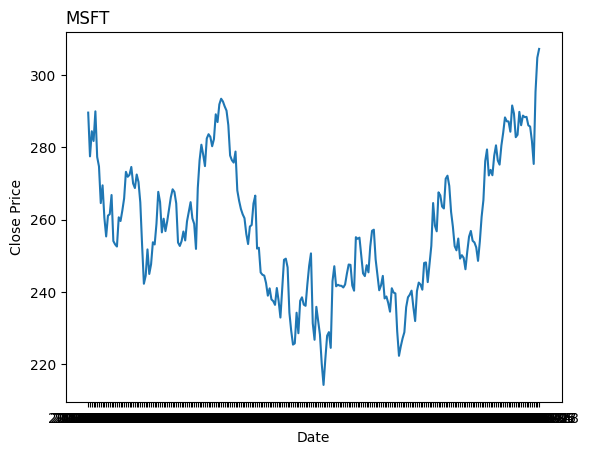

In [ ]:
# Without string to datetime conversion
plt.plot(df['Date'], df['Close'])
plt.title("MSFT", loc = 'left')
plt.xlabel("Date")
plt.ylabel("Close Price")

In [ ]:
import datetime
# To split str into date , month , year 
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.date(year=year, month=month, day=day)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)

<ipython-input-149-82fc7f804c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


Text(0, 0.5, 'Close Price')

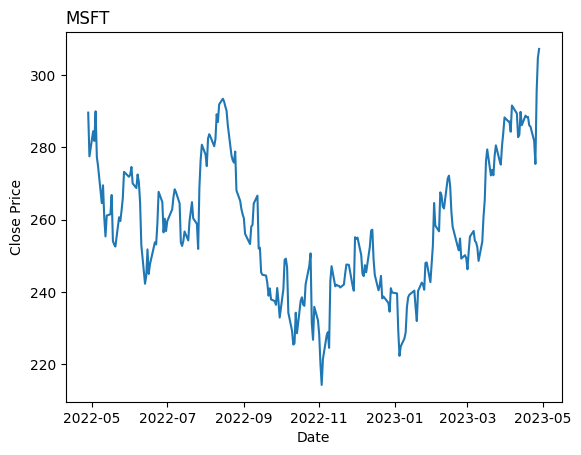

In [ ]:
# With Date to string conversion 
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'])
plt.title("MSFT", loc = 'left')
plt.xlabel("Date")
plt.ylabel("Close Price")

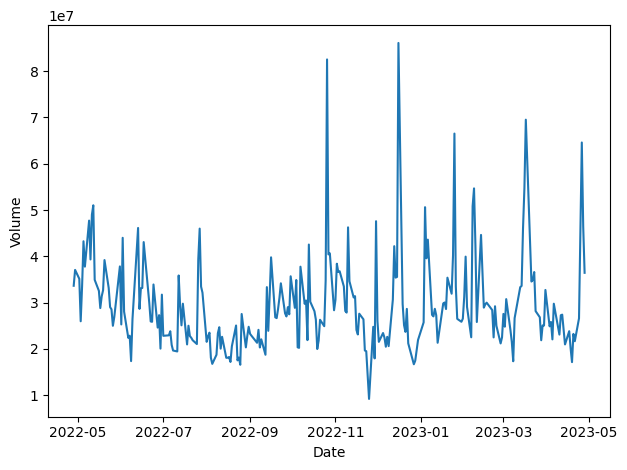

In [ ]:
plt.plot(df['Date'],data['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.tight_layout()

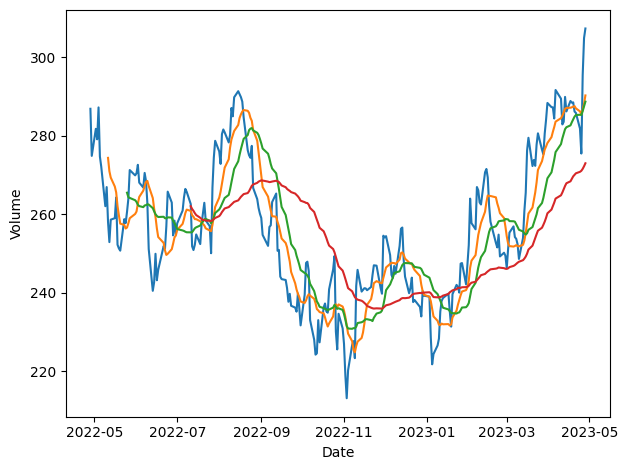

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data[column_name] = data['Adj Close'].rolling(ma).mean()

data1 = data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]
plt.plot(df['Date'],data1)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.tight_layout()

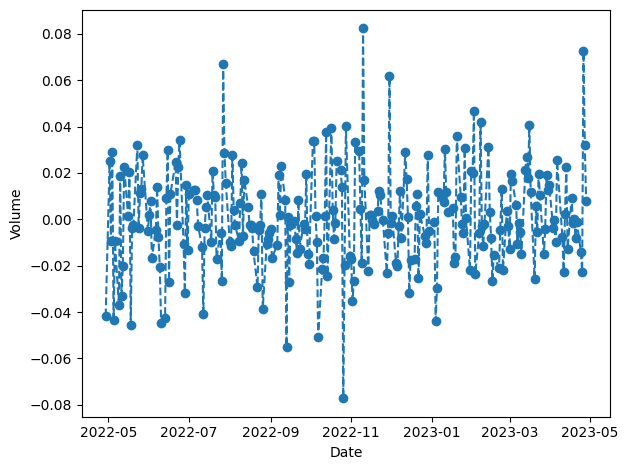

In [ ]:
data['Daily Return'] = data['Adj Close'].pct_change()

data2 = data['Daily Return']
plt.plot(df['Date'],data2,'o',linestyle='--')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.tight_layout()


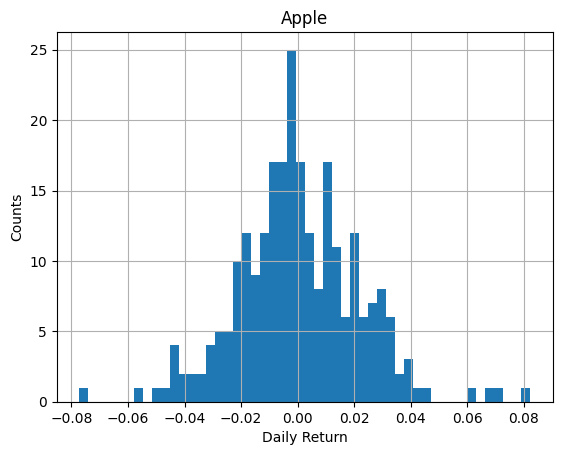

In [ ]:
for i, company in enumerate(data, 1):
    plt.plot()
    data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'Microsoft')

#Prediction

In [ ]:
df.index = df.pop('Date')
df.tail(3)

,Close
Date,
2022-04-28,289.630005
2022-04-29,277.519989
2022-05-02,284.470001


In [ ]:
import numpy as np
# Split dataframe to date 
def df_split(dataframe, first_date_str, last_date_str):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)
  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(4)
    values = df_subset['Close'].to_numpy()                  # Convert 
    x, y = values[:-1], values[-1]
    print(values)
    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_date_str = str(next_week.head(2).tail(1).index.values[0])
    year, month, day = next_date_str.split('-')
    next_date = datetime.date(day=int(day), month=int(month), year=int(year))
    
    if target_date == last_date:
      break
    target_date = next_date
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, 3):
    X[:, i]
    ret_df[f'Target-{3-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

In [ ]:
def Get_date_x_y(splitted_df):
  df_as_np = splitted_df.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


In [ ]:
splitted_df = df_split(df,'2022-05-03', '2023-04-28')
splitted_df

[289.630005 277.519989 284.470001 281.779999]
[277.519989 284.470001 281.779999 289.980011]
[284.470001 281.779999 289.980011 277.350006]
[281.779999 289.980011 277.350006 274.730011]
[289.980011 277.350006 274.730011 264.579987]
[277.350006 274.730011 264.579987 269.5     ]
[274.730011 264.579987 269.5      260.549988]
[264.579987 269.5      260.549988 255.350006]
[269.5      260.549988 255.350006 261.119995]
[260.549988 255.350006 261.119995 261.5     ]
[255.350006 261.119995 261.5      266.820007]
[261.119995 261.5      266.820007 254.080002]
[261.5      266.820007 254.080002 253.139999]
[266.820007 254.080002 253.139999 252.559998]
[254.080002 253.139999 252.559998 260.649994]
[253.139999 252.559998 260.649994 259.619995]
[252.559998 260.649994 259.619995 262.519989]
[260.649994 259.619995 262.519989 265.899994]
[259.619995 262.519989 265.899994 273.23999 ]
[262.519989 265.899994 273.23999  271.869995]
[265.899994 273.23999  271.869995 272.420013]
[273.23999  271.869995 272.420013 

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-05-03,289.630005,277.519989,284.470001,281.779999
1,2022-05-04,277.519989,284.470001,281.779999,289.980011
2,2022-05-05,284.470001,281.779999,289.980011,277.350006
3,2022-05-06,281.779999,289.980011,277.350006,274.730011
4,2022-05-09,289.980011,277.350006,274.730011,264.579987
...,...,...,...,...,...
244,2023-04-24,288.450012,286.109985,285.760010,281.769989
245,2023-04-25,286.109985,285.760010,281.769989,275.420013
246,2023-04-26,285.760010,281.769989,275.420013,295.369995
247,2023-04-27,281.769989,275.420013,295.369995,304.829987


In [ ]:
dates, X, y =  Get_date_x_y(splitted_df)
dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

In [ ]:
# Train , Validate and Split of Date , X (Middle matrix ) and Y (target)
date_split_80 = int(0.8*len(dates))
X_split_80 = int(0.8*len(X))
Y_split_80 = int(0.8*len(y))

date_split_90 = int(0.9*len(dates))
X_split_90 = int(0.9*len(X))
Y_split_90 = int(0.9*len(y))

dates_train, X_train, y_train = dates[:date_split_80], X[:X_split_80], y[:Y_split_80]
dates_val, X_val, y_val = dates[date_split_80:date_split_90], X[X_split_80:X_split_90], y[Y_split_80:Y_split_90]
dates_test, X_test, y_test = dates[date_split_90:], X[X_split_90:], y[Y_split_90:]

# plt.plot(dates_train, y_train)
# plt.plot(dates_val, y_val)
# plt.plot(dates_test, y_test)

# plt.legend(['Train', 'Validation', 'Test'])
# plt.show()


In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 321ms/step - loss: 64437.7578 - mean_absolute_error: 253.2805 - val_loss: 67067.7578 - val_mean_absolute_error: 258.7783
Epoch 2/100
7/7 [==============================] - 0s 30ms/step - loss: 64275.4688 - mean_absolute_error: 252.9597 - val_loss: 66823.7266 - val_mean_absolute_error: 258.3063
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 63955.2227 - mean_absolute_error: 252.3232 - val_loss: 66307.1016 - val_mean_absolute_error: 257.3043
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 63260.7344 - mean_absolute_error: 250.9440 - val_loss: 65169.0898 - val_mean_absolute_error: 255.0833
Epoch 5/100
7/7 [==============================] - 0s 32ms/step - loss: 61782.2578 - mean_absolute_error: 247.9860 - val_loss: 62929.8984 - val_mean_absolute_error: 250.6558
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 58975.0000 - mean_absolute_error: 242.2495 - val_loss: 58

7/7 [==============================] - 2s 5ms/step


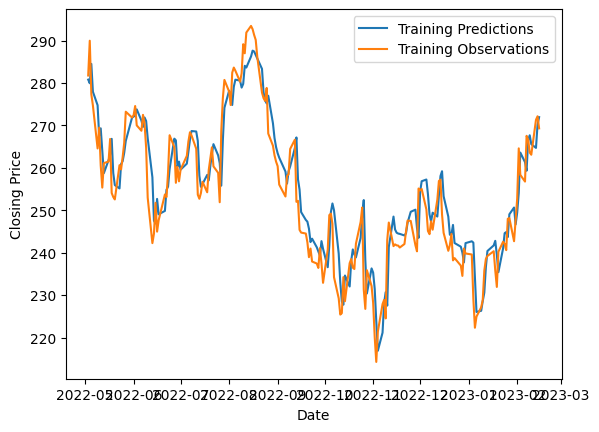

In [ ]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

1/1 [==============================] - 0s 47ms/step


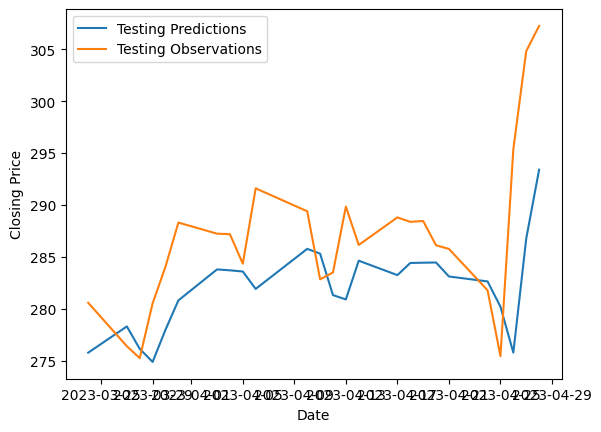

In [ ]:
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()